In [1]:
from google.colab import drive 
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 465 kB 60.2 MB/s 


In [3]:
import numpy as np                    # numpy 패키지 가져오기
import pandas as pd                   # pandas 패키지 가져오기
import matplotlib.pyplot as plt       # 시각화 패키지 가져오기

from konlpy.tag import Kkma 
from konlpy.tag import Okt 

from wordcloud  import WordCloud

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
file_path =  "/content/gdrive/My Drive/기계학습/"
cocktail=pd.read_csv(file_path+'all_drinks.csv')
cocktail
#file_full_path=file_path +'cocktails.csv'
#cocktail_df.to_csv(file_full_path ,  index = False, encoding="utf-8-sig")

,Unnamed: 0,strDrink,dateModified,idDrink,strAlcoholic,strCategory,strDrinkThumb,strGlass,strIBA,strIngredient1,...,strMeasure15,strMeasure2,strMeasure3,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strVideo
0,0,'57 Chevy with a White License Plate,2016-07-18 22:49:04,14029,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Highball glass,NaN,Creme de Cacao,...,NaN,1 oz,,,,,,NaN,NaN,NaN
1,1,1-900-FUK-MEUP,2016-07-18 22:27:04,15395,Alcoholic,Shot,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,Absolut Kurant,...,NaN,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/4 oz,1/2 oz,1/4 oz,,NaN
2,2,110 in the shade,2016-02-03 14:51:57,15423,Alcoholic,Beer,http://www.thecocktaildb.com/images/media/drin...,Beer Glass,NaN,Lager,...,NaN,1.5 oz,,,,,,NaN,NaN,NaN
3,3,151 Florida Bushwacker,2016-07-18 22:28:43,14588,Alcoholic,Milk / Float / Shake,http://www.thecocktaildb.com/images/media/drin...,Beer mug,NaN,Malibu rum,...,NaN,1/2 oz,1/2 oz Bacardi,1 oz,1 oz,3 oz,1 oz,1 cup,,NaN
4,4,155 Belmont,2016-10-05 12:36:28,15346,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,White wine glass,NaN,Dark rum,...,NaN,2 shots,1 shot,1 shot,,,,,,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,541,Zippy's Revenge,2017-01-28 16:18:33,14065,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Old-fashioned glass,NaN,Amaretto,...,NaN,2 oz,4 oz Grape,,,,,,NaN,NaN
542,542,Zizi Coin-coin,2017-01-28 16:25:52,14594,Alcoholic,Punch / Party Drink,http://www.thecocktaildb.com/images/media/drin...,Margarita/Coupette glass,NaN,Cointreau,...,NaN,2 cl,cubes\n,or lime\n,\n,\n,\n,\n,\n,NaN
543,543,Zoksel,2017-01-28 16:28:50,15691,Alcoholic,Soft Drink / Soda,http://www.thecocktaildb.com/images/media/drin...,Beer pilsner,NaN,Beer,...,NaN,\n,\n,slice\n,\n,\n,\n,\n,\n,NaN
544,544,Zorbatini,2017-01-28 16:32:35,16963,Alcoholic,Cocktail,http://www.thecocktaildb.com/images/media/drin...,Cocktail glass,NaN,Vodka,...,NaN,1/4 oz,,,,,,NaN,NaN,NaN


In [5]:
cocktail_1=cocktail.loc[:,['strDrink','strCategory','strIngredient1','strIngredient2','strIngredient3','strIngredient4','strIngredient5','strIngredient6','strIngredient7','strIngredient8','strIngredient9','strInstructions']]
cocktail_1.to_csv(file_path+'cocktail_1.csv',index = False, encoding="utf-8-sig")
cocktail_1

,strDrink,strCategory,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strInstructions
0,'57 Chevy with a White License Plate,Cocktail,Creme de Cacao,Vodka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. Fill a rocks glass with ice 2.add white cre...
1,1-900-FUK-MEUP,Shot,Absolut Kurant,Grand Marnier,Chambord raspberry liqueur,Midori melon liqueur,Malibu rum,Amaretto,Cranberry juice,Pineapple juice,NaN,Shake ingredients in a mixing tin filled with ...
2,110 in the shade,Beer,Lager,Tequila,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drop shooter in glass. Fill with beer
3,151 Florida Bushwacker,Milk / Float / Shake,Malibu rum,Light rum,151 proof rum,Dark Creme de Cacao,Cointreau,Milk,Coconut liqueur,Vanilla ice-cream,NaN,Combine all ingredients. Blend until smooth. G...
4,155 Belmont,Cocktail,Dark rum,Light rum,Vodka,Orange juice,NaN,NaN,NaN,NaN,NaN,Blend with ice. Serve in a wine glass. Garnish...
...,...,...,...,...,...,...,...,...,...,...,...,...
541,Zippy's Revenge,Cocktail,Amaretto,Rum,Kool-Aid,NaN,NaN,NaN,NaN,NaN,NaN,Mix Kool-Aid to taste then add Rum and ammaret...
542,Zizi Coin-coin,Punch / Party Drink,Cointreau,Lemon juice,Ice,Lemon,NaN,NaN,NaN,NaN,NaN,"Pour 5cl of Cointreau on ice, add 2cl of fresh..."
543,Zoksel,Soft Drink / Soda,Beer,Root beer,Lemonade,Coca-Cola,7-Up,Creme de Cassis,Lemon,NaN,NaN,"No specific mixinginstructions, just poor ever..."
544,Zorbatini,Cocktail,Vodka,Ouzo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prepare like a Martini. Garnish with a green o...


In [11]:
#cocktail_1.drop(['TotalIngredient'],axis=1,inplace=True)

In [6]:
totalingredient=[]
total=''
for i in range(len(cocktail_1)):
  total=''
  total=cocktail_1.loc[i,'strIngredient1']+' '
  if type(cocktail_1.loc[i,'strIngredient2'])==str:
    total+=cocktail_1.loc[i,'strIngredient2']
    total+=' '

  if type(cocktail_1.loc[i,'strIngredient3'])==str:
    total+=cocktail_1.loc[i,'strIngredient3']
    total+=' '

  if type(cocktail_1.loc[i,'strIngredient4'])==str:
    total+=cocktail_1.loc[i,'strIngredient4']
    total+=' '

  if type(cocktail_1.loc[i,'strIngredient5'])==str:
    total+=cocktail_1.loc[i,'strIngredient5']
    total+=' '

  if type(cocktail_1.loc[i,'strIngredient6'])==str:
    total+=cocktail_1.loc[i,'strIngredient6']
    total+=' '

  if type(cocktail_1.loc[i,'strIngredient7'])==str:
    total+=cocktail_1.loc[i,'strIngredient7']
    total+=' '

  if type(cocktail_1.loc[i,'strIngredient8'])==str:
    total+=cocktail_1.loc[i,'strIngredient8']
    total+=' '

  if type(cocktail_1.loc[i,'strIngredient9'])==str:
    total+=cocktail_1.loc[i,'strIngredient9']
    total+=' '
  cocktail_1.loc[i,'total_ingredient']=total
  totalingredient.append(total)
  total=''
  

In [9]:
tot=np.array(totalingredient)
cocktail_1.head(10)

,strDrink,strCategory,strIngredient1,strIngredient2,strIngredient3,strIngredient4,strIngredient5,strIngredient6,strIngredient7,strIngredient8,strIngredient9,strInstructions,total_ingredient
0,'57 Chevy with a White License Plate,Cocktail,Creme de Cacao,Vodka,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1. Fill a rocks glass with ice 2.add white cre...,Creme de Cacao Vodka
1,1-900-FUK-MEUP,Shot,Absolut Kurant,Grand Marnier,Chambord raspberry liqueur,Midori melon liqueur,Malibu rum,Amaretto,Cranberry juice,Pineapple juice,NaN,Shake ingredients in a mixing tin filled with ...,Absolut Kurant Grand Marnier Chambord raspberr...
2,110 in the shade,Beer,Lager,Tequila,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Drop shooter in glass. Fill with beer,Lager Tequila
3,151 Florida Bushwacker,Milk / Float / Shake,Malibu rum,Light rum,151 proof rum,Dark Creme de Cacao,Cointreau,Milk,Coconut liqueur,Vanilla ice-cream,NaN,Combine all ingredients. Blend until smooth. G...,Malibu rum Light rum 151 proof rum Dark Creme ...
4,155 Belmont,Cocktail,Dark rum,Light rum,Vodka,Orange juice,NaN,NaN,NaN,NaN,NaN,Blend with ice. Serve in a wine glass. Garnish...,Dark rum Light rum Vodka Orange juice
5,24k nightmare,Shot,Goldschlager,Jägermeister,Rumple Minze,151 proof rum,NaN,NaN,NaN,NaN,NaN,"Add over ice,shake and pour.",Goldschlager Jägermeister Rumple Minze 151 pro...
6,252,Shot,151 proof rum,Wild Turkey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Add both ingredients to shot glass, shoot, and...",151 proof rum Wild Turkey
7,3 Wise Men,Shot,Jack Daniels,Johnnie Walker,Jim Beam,NaN,NaN,NaN,NaN,NaN,NaN,put them them in a glass... and slam it to tha...,Jack Daniels Johnnie Walker Jim Beam
8,3-Mile Long Island Iced Tea,Ordinary Drink,Gin,Light rum,Tequila,Triple sec,Vodka,Coca-Cola,Sweet and sour,Bitters,Lemon,Fill 14oz glass with ice and alcohol. Fill 2/3...,Gin Light rum Tequila Triple sec Vodka Coca-Co...
9,410 Gone,Ordinary Drink,Peach Vodka,Coca-Cola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Peach Vodka Coca-Cola


In [38]:
cocktail_2=cocktail_1.loc[:,['strDrink','strCategory','strInstructions','total_ingredient']]
cocktail_2.to_csv(file_path+'cocktail_1.csv',index = False, encoding="utf-8-sig")
cocktail_2

,strDrink,strCategory,strInstructions,total_ingredient
0,'57 Chevy with a White License Plate,Cocktail,1. Fill a rocks glass with ice 2.add white cre...,Creme de Cacao Vodka
1,1-900-FUK-MEUP,Shot,Shake ingredients in a mixing tin filled with ...,Absolut Kurant Grand Marnier Chambord raspberr...
2,110 in the shade,Beer,Drop shooter in glass. Fill with beer,Lager Tequila
3,151 Florida Bushwacker,Milk / Float / Shake,Combine all ingredients. Blend until smooth. G...,Malibu rum Light rum 151 proof rum Dark Creme ...
4,155 Belmont,Cocktail,Blend with ice. Serve in a wine glass. Garnish...,Dark rum Light rum Vodka Orange juice
...,...,...,...,...
541,Zippy's Revenge,Cocktail,Mix Kool-Aid to taste then add Rum and ammaret...,Amaretto Rum Kool-Aid
542,Zizi Coin-coin,Punch / Party Drink,"Pour 5cl of Cointreau on ice, add 2cl of fresh...",Cointreau Lemon juice Ice Lemon
543,Zoksel,Soft Drink / Soda,"No specific mixinginstructions, just poor ever...",Beer Root beer Lemonade Coca-Cola 7-Up Creme d...
544,Zorbatini,Cocktail,Prepare like a Martini. Garnish with a green o...,Vodka Ouzo


In [51]:
cock_ingre=cocktail_2['total_ingredient']
cock_tfidf=TfidfVectorizer().fit_transform(cock_ingre)
print(cock_tfidf)

  (0, 274)	0.3467112577605611
  (0, 51)	0.611021652703468
  (0, 102)	0.5032116074126333
  (0, 94)	0.5032116074126333
  (1, 209)	0.20701473606978874
  (1, 151)	0.22595497570118447
  (1, 92)	0.2203274466619748
  (1, 10)	0.19498101419766534
  (1, 226)	0.1455671379891092
  (1, 171)	0.2697413228705309
  (1, 180)	0.25990905618467175
  (1, 182)	0.264601419930955
  (1, 170)	0.3821617875016853
  (1, 219)	0.25990905618467175
  (1, 63)	0.2754232219631221
  (1, 177)	0.264601419930955
  (1, 131)	0.264601419930955
  (1, 158)	0.31915519907908707
  (1, 2)	0.2380430676266893
  (2, 264)	0.6026129848756312
  (2, 159)	0.7980335772755945
  (3, 93)	0.16681056095503297
  (3, 144)	0.17899094924721723
  (3, 272)	0.23252994277696254
  (3, 76)	0.2787800668691477
  :	:
  (541, 226)	0.292391578215747
  (542, 162)	0.5879301140253873
  (542, 144)	0.40053867013603767
  (542, 79)	0.6545405253301386
  (542, 151)	0.2558977441250622
  (543, 163)	0.2865833120158937
  (543, 60)	0.31863353534686534
  (543, 222)	0.3106933892

In [60]:
from sklearn.cluster import KMeans

inertia_arr=[]
for k in range(2,20):

  Kmeans=KMeans(n_clusters=k, random_state=0)
  Kmeans.fit(cock_tfidf)
  interia=Kmeans.inertia_
  
  print('k:', k, 'inertia:', interia)

  inertia_arr.append(interia)

inertia_arr=np.array(inertia_arr)

k: 2 inertia: 498.9627763893242
k: 3 inertia: 486.3270002540637
k: 4 inertia: 475.35351277094526
k: 5 inertia: 466.3523343422587
k: 6 inertia: 455.22655412214726
k: 7 inertia: 449.98550464637685
k: 8 inertia: 439.21741686306046
k: 9 inertia: 432.27505167749314
k: 10 inertia: 427.9852371885464
k: 11 inertia: 421.7434855430837
k: 12 inertia: 416.9887372468138
k: 13 inertia: 409.90103514347925
k: 14 inertia: 405.641232635171
k: 15 inertia: 401.75392330026204
k: 16 inertia: 396.0455911170386
k: 17 inertia: 393.9697870470741
k: 18 inertia: 391.7481366968386
k: 19 inertia: 387.7458924569433


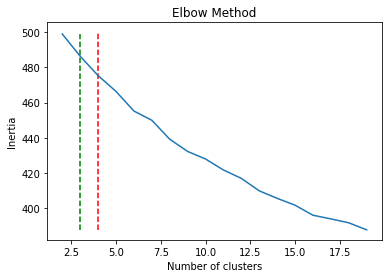

In [61]:
plt.plot(range(2,20),inertia_arr)
plt.vlines(3, ymin=inertia_arr.min()*0.9999,ymax=inertia_arr.max()*1.0003,linestyles='--',colors='g')
plt.vlines(4, ymin=inertia_arr.min()*0.9999,ymax=inertia_arr.max()+1.0003,linestyles='--',colors='r')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

elbow method로 하면 잘은 안보이는데 k=7~8쯤?

In [62]:
#실루엣 계수가 1에 가까워야 하는데 0.1 넘는거 k=41 하나
from sklearn.metrics import silhouette_score
best_n=-1
best_silhouette_score=-1
for k in range(2,50):

  kmeans=KMeans(n_clusters=k, random_state=0)
  kmeans.fit(cock_tfidf)
  clusters=kmeans.predict(cock_tfidf)

  score=silhouette_score(cock_tfidf, clusters)
  print('k:', k, 'score:', score)

  if score>best_silhouette_score:
    best_n=k
    best_silhouette_score=score

print('best n:', best_n, 'best score:', best_silhouette_score)

k: 2 score: 0.030769782579594476
k: 3 score: 0.028150646098727174
k: 4 score: 0.03308694939069584
k: 5 score: 0.03615319527220715
k: 6 score: 0.04546570392977329
k: 7 score: 0.043164197301464764
k: 8 score: 0.05349137680985737
k: 9 score: 0.055090226194873713
k: 10 score: 0.0578282725036037
k: 11 score: 0.06196160788856917
k: 12 score: 0.06504198131831687
k: 13 score: 0.06913747678087796
k: 14 score: 0.0695327981653394
k: 15 score: 0.07704738350351721
k: 16 score: 0.07158061605381437
k: 17 score: 0.07680906442201657
k: 18 score: 0.07984383199784063
k: 19 score: 0.08166854908141766
k: 20 score: 0.07665790489051462
k: 21 score: 0.07966145715634801
k: 22 score: 0.08320125656802553
k: 23 score: 0.07923985321012082
k: 24 score: 0.0841756464863589
k: 25 score: 0.08451968728092724
k: 26 score: 0.08225512184241306
k: 27 score: 0.08650216352292452
k: 28 score: 0.08609401445989179
k: 29 score: 0.08535333293648648
k: 30 score: 0.08703467023186957
k: 31 score: 0.08195826720269501
k: 32 score: 0.08

In [67]:
from sklearn.cluster import KMeans

cock_cluster=KMeans(n_clusters=41, max_iter=10000,random_state=0)
cock_cluster.fit(cock_tfidf)
cluster_label=cock_cluster.labels_
cluster_centers=cock_cluster.cluster_centers_

In [70]:
cocktail_sil=cocktail_2
cocktail_sil['cluster_label']=cluster_label
cocktail_sil[cocktail_sil['cluster_label']==27].sort_values(by='strDrink')

,strDrink,strCategory,strInstructions,total_ingredient,cluster_label
3,151 Florida Bushwacker,Milk / Float / Shake,Combine all ingredients. Blend until smooth. G...,Malibu rum Light rum 151 proof rum Dark Creme ...,27
4,155 Belmont,Cocktail,Blend with ice. Serve in a wine glass. Garnish...,Dark rum Light rum Vodka Orange juice,27
31,Abilene,Ordinary Drink,Pour all of the ingredients into a highball gl...,Dark rum Peach nectar Orange juice,27
43,Adam,Ordinary Drink,"In a shaker half-filled with ice cubes, combin...",Dark rum Lemon juice Grenadine,27
69,Almeria,Ordinary Drink,"In a shaker half-filled with ice cubes, combin...",Dark rum Kahlua Egg white,27
145,Bleeding Surgeon,Soft Drink / Soda,Pour Shot of Rum over slice of orange. Fill th...,Dark rum Orange Surge Cranberry juice,27
163,Brain Fart,Punch / Party Drink,Mix all ingredients together. Slowly and gentl...,Everclear Vodka Mountain Dew Surge Lemon juice...,27
218,Dark and Stormy,Ordinary Drink,In a highball glass filled with ice add 6cl da...,Dark Rum Ginger Beer,27
261,Gideon's Green Dinosaur,Ordinary Drink,Add all ingredients in collins glass with ice ...,Dark rum Vodka Triple sec Tequila Melon liqueu...,27
356,Lord And Lady,Ordinary Drink,Pour the rum and Tia Maria into an old-fashion...,Dark rum Tia maria,27


TypeError: ignored

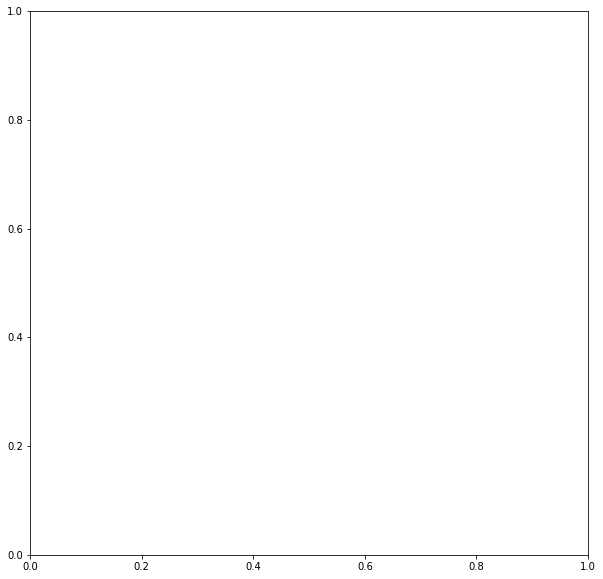

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10, 10))

for i in range(41):
    #plt.scatter(cocktail_sil.loc[cocktail_sil['cluster_label']==i], cocktail_sil.loc[cocktail_sil['cluster_label']==i])
    plt.scatter(cocktail_sil[cocktail_sil['cluster_label']==i], cocktail_sil[cocktail_sil['cluster_label']==i])


plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('Annual Income', size = 12)
plt.ylabel('Spending Score', size = 12)
plt.show()

,strDrink,strCategory,strInstructions,total_ingredient,cluster_label


In [ ]:
cnt_vect=CounterVectorizer()
cnt_vect.fit(X_train)
X_train_cnt_vect=cnt_vect.transform(X_train)



In [18]:
okt = Okt()
def tokenizer(text):
    nouns = okt.nouns(text)
    return [noun for noun in nouns if len(noun) > 1]
cock_ingre=cocktail_2['total_ingredient']
tfidf_vectorizer = TfidfVectorizer(stop_words=None,tokenizer=tokenizer)
tfidf_matrix = tfidf_vectorizer.fit_transform(cock_ingre)

ValueError: ignored